In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
test = pd.read_csv("/content/USA_ALL_import_2020_allproduct.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,783976899,NaN,783976899,0
1,H4,2016,2016,2016,4,0,0,X,842,USA,...,166662,5,u,166662,NaN,NaN,424875770,NaN,424875770,0
2,H4,2016,2016,2016,6,1,0,X,842,USA,...,23272,5,u,23272,NaN,NaN,259143626,NaN,259143626,0
3,H4,2016,2016,2016,6,1,0,X,842,USA,...,126485,5,u,126485,NaN,NaN,158080955,NaN,158080955,0
4,H4,2016,2016,2016,6,1,0,X,842,USA,...,12533,5,u,12533,NaN,NaN,2839800,NaN,2839800,0


In [ ]:
test.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [ ]:
test2016 = test[['Commodity Code', 'Commodity', 'Trade Value (US$)']]

In [ ]:
# Extract the large category data (`Commodity Code`<100)
df = test.query('`Commodity Code`!="TOTAL"')
df = df.astype({'Commodity Code': 'int32'})
df = df.query('`Partner Code`==0').query('`Commodity Code`<100').sort_values(by = "Trade Value (US$)", ascending = False)[['Commodity Code', 'Commodity', 'Trade Value (US$)']].iloc[:10, ]
df

,Commodity Code,Commodity,Trade Value (US$)
5029,84,"Nuclear reactors, boilers, machinery and mecha...",361551454128
5631,85,Electrical machinery and equipment and parts t...,343474039898
5975,87,Vehicles; other than railway or tramway rollin...,254436751363
1945,30,Pharmaceutical products,139518097697
1269,27,"Mineral fuels, mineral oils and products of th...",130118461274
4241,71,"Natural, cultured pearls; precious, semi-preci...",104819659766
6587,99,Commodities not specified according to kind,102547452199
6124,90,"Optical, photographic, cinematographic, measur...",90870555532
6416,94,"Furniture; bedding, mattresses, mattress suppo...",65480039196
2339,39,Plastics and articles thereof,62464752374


In [ ]:
tradetop10 = pd.DataFrame()

# Read export and import data from 2016 to 2020.
for i in range(16, 21):
  for j in ["ex", "im"]:
    file = "/content/USA_ALL_{}port_20{}_allproduct.csv".format(j, str(i))
    df = pd.read_csv(file)
    df = df.query('`Commodity Code`!="TOTAL"')
    df = df.astype({'Commodity Code': 'int32'})

    # Extract the top10 categories by trade value
    df = df.query('`Partner Code`==0').query('`Commodity Code`<100').query('Commodity != "Commodities not specified according to kind"').sort_values(by = "Trade Value (US$)", ascending = False)[['Commodity Code', 'Commodity', 'Trade Value (US$)']].iloc[:10, ]
    df['Year'] = 2000+i
    df['type'] = j+"port"
    tradetop10 = pd.concat([tradetop10, df])


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
tradetop10.to_csv("tradetop10.csv")

In [ ]:
# Get abbreviation of commodity types as the text in visuals
tradetop10['Commodity_abbr'] = tradetop10['Commodity'].map(lambda x: x.split(" ")[0])
tradetop10.to_csv("tradetop101.csv")

In [3]:
trade = pd.read_csv("/content/tradetop10.csv")

In [ ]:
trade.dtypes

Unnamed: 0             int64
Commodity Code         int64
Commodity             object
Trade Value (US$)    float64
Year                   int64
type                  object
Commodity_abbr        object
dtype: object

In [73]:
exp = trade.query('type == "export"').rename(columns = {'Trade Value (US$)': 'value', 'Commodity_abbr': 'name'})
imp = trade.query('type == "import"').rename(columns = {'Trade Value (US$)': 'value', 'Commodity_abbr': 'name'})

In [74]:
exp

,Unnamed: 0,Commodity Code,Commodity,value,Year,type,name
0,4954,84,"Nuclear reactors, boilers, machinery and mecha...",1.909450e+11,2016,export,Nuclear Appliances
1,5548,85,Electrical machinery and equipment and parts t...,1.669640e+11,2016,export,Electrical Machinery and Sound Recorders
2,5982,88,"Aircraft, spacecraft and parts thereof",1.347420e+11,2016,export,Aerospace
3,5891,87,Vehicles; other than railway or tramway rollin...,1.247020e+11,2016,export,Vehicles
4,1267,27,"Mineral fuels, mineral oils and products of th...",9.400549e+10,2016,export,Minerals
5,6028,90,"Optical, photographic, cinematographic, measur...",8.201645e+10,2016,export,Optical Apparatus
6,2295,39,Plastics and articles thereof,5.862835e+10,2016,export,Plastic Articles
7,4163,71,"Natural, cultured pearls; precious, semi-preci...",5.722699e+10,2016,export,Gems and Metals
8,1915,30,Pharmaceutical products,4.682863e+10,2016,export,Pharmaceutical Products
9,1539,29,Organic chemicals,3.395646e+10,2016,export,Organic Chemicals


In [ ]:
list(imp['name'].drop_duplicates())

['Electrical Machinery and Sound Recorders',
 'Nuclear Appliances',
 'Vehicles',
 'Minerals',
 'Pharmaceutical Products',
 'Optical Apparatus',
 'Gems and Metals',
 'Furniture',
 'Plastic Articles',
 'Organic Chemicals']

In [6]:
trade = trade.rename(columns = {'Trade Value (US$)': 'value', 'Commodity_abbr': 'name'})

In [4]:
# Set colors for the bars
colors = dict(zip(
    ["Nuclear Appliances", "Optical Apparatus", "Electrical Machinery and Sound Recorders", "Aerospace", "Vehicles", "Minerals", "Plastic Articles", "Organic Chemicals", "Pharmaceutical Products", "Gems and Metals", "Furniture"],
    ['violet', 'hotpink', 'deepskyblue', 'orange', 'lightgreen', 'yellow', 'lightskyblue', 'lightsalmon', 'aquamarine', 'moccasin', 'pink']
))

export


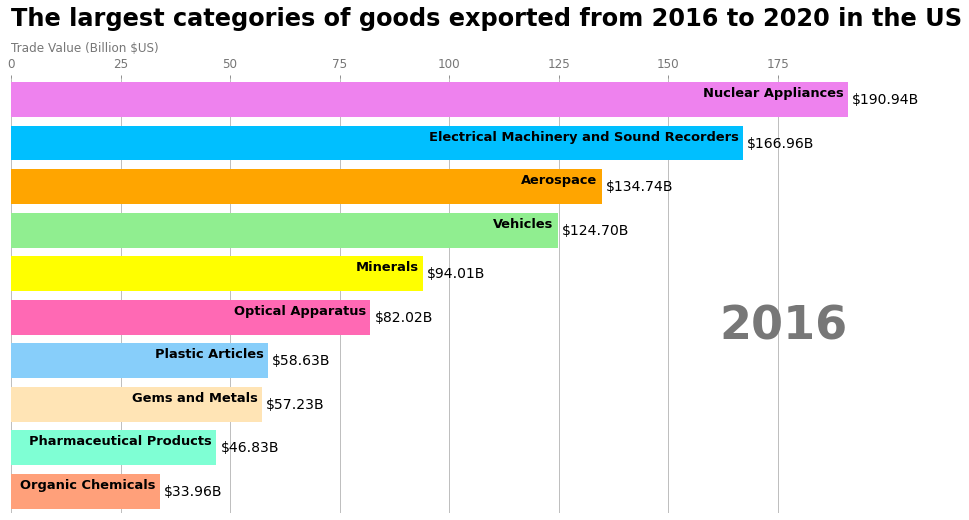

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))


# Draw for export data (type = "export"/"import")
def draw_barchart(year, type1):
    qstr = 'type == "{}"'.format(type1)
    #print(qstr)
    data = trade.query(qstr)
    #print(data)
    #print(data.head(20))
    dff = data[data['Year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[x] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=13, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     '$'+f'{value/1000000000:,.2f}'+'B',  size=14, ha='left',  va='center')

    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Trade Value (Billion $US)', transform=ax.transAxes, size=12, color='#777777')
    # ticker
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: int(x/1000000000)))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    print(type1)
    ax.text(0, 1.12, 'The largest categories of goods {}ed from 2016 to 2020 in the US'.format(type1),
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    
draw_barchart(2016, "export")

export
export
export
export
export
export


export


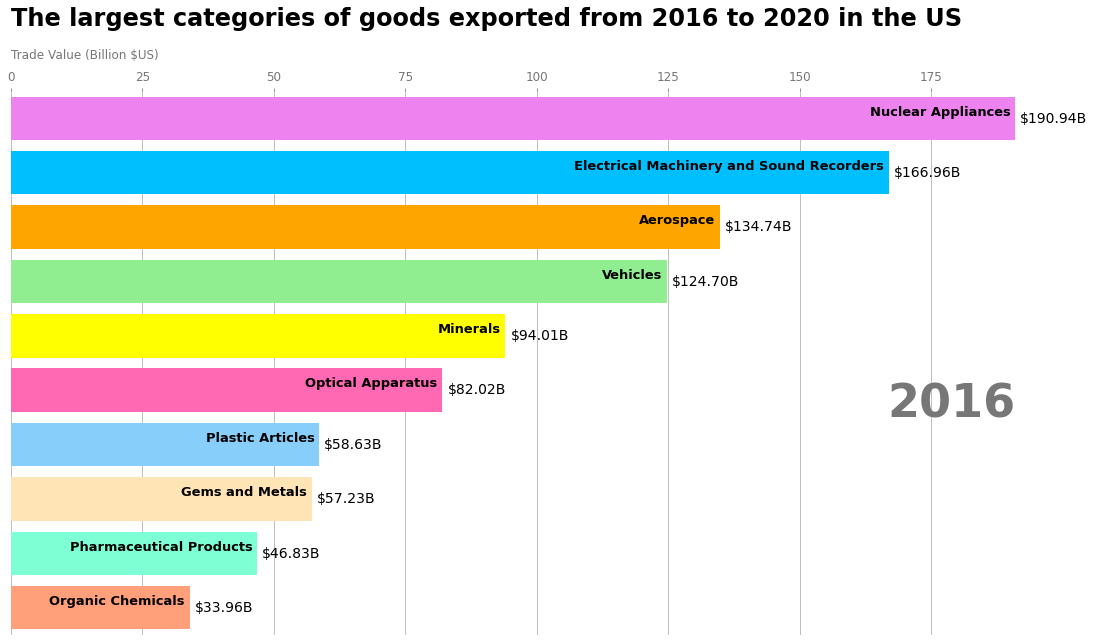

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

# type = "import"/"export"
fig, ax = plt.subplots(figsize=(18, 10))
# Turn the visuals from 2016 to 2020 into an animated one
anim_exp = animation.FuncAnimation(fig, draw_barchart, frames=range(2016, 2021), fargs=("export",), interval=800) 
#anim_imp = animation.FuncAnimation(fig, draw_barchart, frames=range(2016, 2021), fargs=("import",), interval=800) 

HTML(anim_exp.to_jshtml())

In [10]:
with open("export.html", "w") as f:
    print(anim_exp.to_jshtml(), file=f)

import
import
import
import
import
import


import


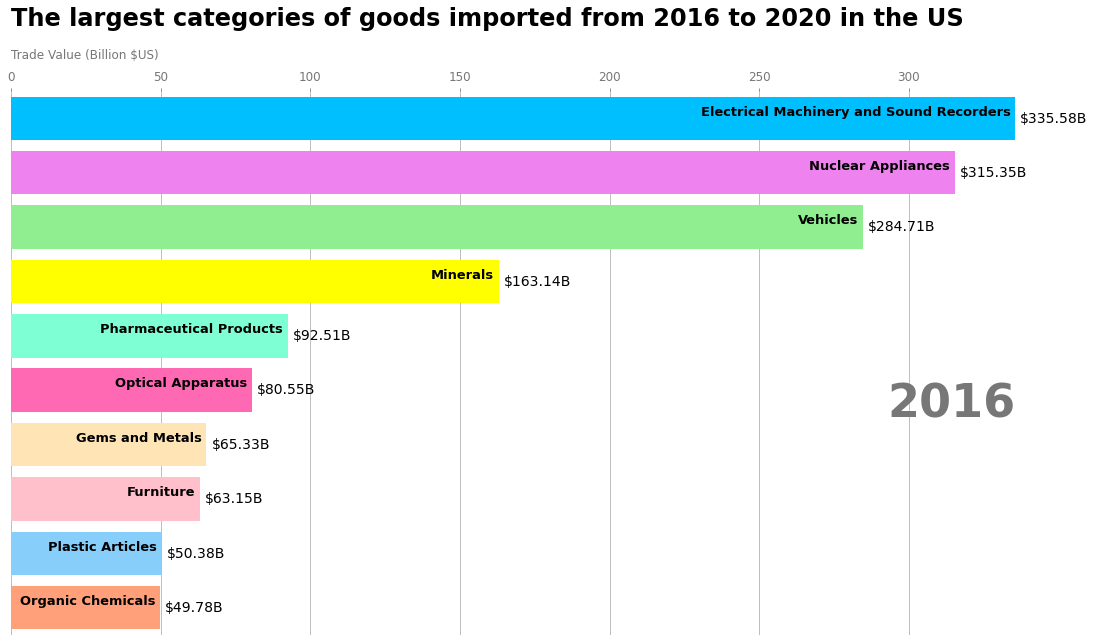

In [11]:
fig, ax = plt.subplots(figsize=(18, 10))
# Turn the visuals from 2016 to 2020 into an animated one
#anim_exp = animation.FuncAnimation(fig, draw_barchart, frames=range(2016, 2021), fargs=("export",), interval=800) 
anim_imp = animation.FuncAnimation(fig, draw_barchart, frames=range(2016, 2021), fargs=("import",), interval=800) 

HTML(anim_imp.to_jshtml())

In [12]:
with open("import.html", "w") as f:
    print(anim_imp.to_jshtml(), file=f)